In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)
# X2= np.array([
#   [4,3],
#   [2,1],
# ])
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]]
[[ 1.  4.  3. 16. 12.  9.]
 [ 1.  2.  1.  4.  2.  1.]]


[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


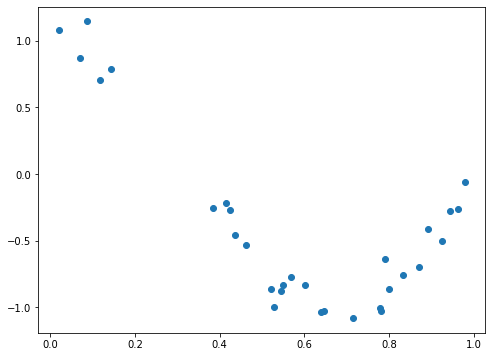

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

def true_func(X):
  return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_func(X) + np.random.randn(n_samples) * 0.1
print(X)
print(y)
plt.figure(figsize=(8,6))
plt.scatter(X, y)

Degree 1, coef : [-1.60931179]
Degree 1, MSE : 0.41
Degree 4, coef : [  0.46754142 -17.78954475  23.5926603   -7.26289872]
Degree 4, MSE : 0.04
Degree 15, coef : [-2.98291188e+03  1.03898766e+05 -1.87415056e+06  2.03715125e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]
Degree 15, MSE : 180526263.29


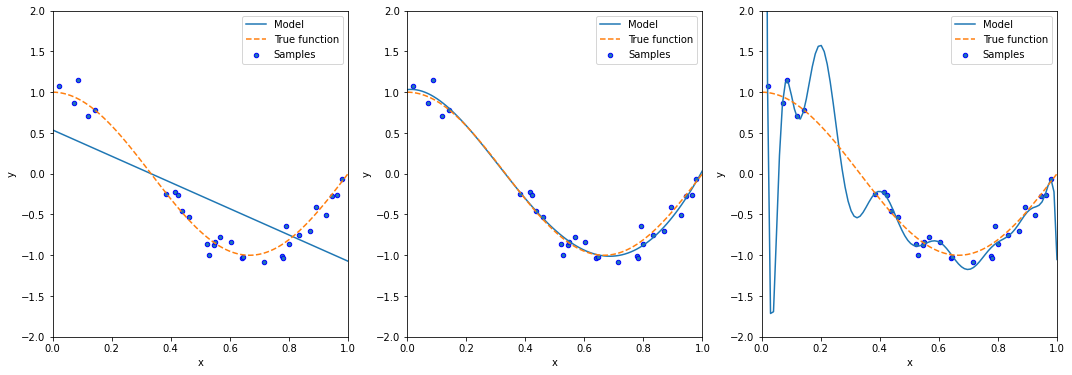

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
degrees = [1, 4, 15]
for i,d in enumerate(degrees):
  ax = axes[i]
  polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
  
  poly_ftr = polynomial_features.fit_transform(X.reshape(-1, 1))
  
  lr = LinearRegression()
  lr.fit(poly_ftr, y)
  scores = cross_val_score(lr, poly_ftr, y, scoring="neg_mean_squared_error", cv=10)
  coef = lr.coef_
  print("Degree %d, coef : %s"%(d, str(coef)))
  print("Degree %d, MSE : %.2f"%(d, -1*np.mean(scores)))
  print("================================================================")
  # TEST
  X_test = np.linspace(0, 1, 100)
  poly_X_test = polynomial_features.fit_transform(X_test.reshape(-1, 1))
  ax.plot(X_test, lr.predict(poly_X_test), label="Model")
  ax.plot(X_test, true_func(X_test), '--', label="True function")
  ax.scatter(X, y, edgecolor="b", s=20, label="Samples")
  ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_xlim((0, 1)); ax.set_ylim((-2, 2));  ax.legend(loc="best")
fig.show()